### Dataset used - Stock_train.csv which tackles the classification problem

In [3]:
#Importing all the necessary libraries

import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import itertools

import tensorflow
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

import bs4 as bs
import requests
import yfinance as yf
import datetime
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Reading in the csv file
data = pd.read_csv(r'D:\Stock_train.csv', sep = ",")
data.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class
0,PG,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,0.000000e+00,1.865400e+10,1.865400e+10,1.376600e+10,4.650000e+08,...,0.0329,0.0505,-0.0195,-0.0529,0.0012,0.0325,0.0000,-0.0156,Consumer Defensive,1
1,VIPS,1.102060e+10,0.3525,8.557810e+09,2.462794e+09,2.733452e+08,8.201852e+08,2.056136e+09,4.066575e+08,1.245995e+07,...,0.0000,0.9219,0.4764,0.5889,1.5821,0.3805,0.2141,0.1920,Consumer Defensive,0
2,KR,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,0.000000e+00,1.916200e+10,2.238300e+10,3.452000e+09,5.220000e+08,...,0.1359,-0.0490,0.0637,0.0769,0.0071,0.1654,0.0000,0.0678,Consumer Defensive,0
3,RAD,2.292754e+10,0.1039,1.786283e+10,5.064707e+09,0.000000e+00,4.776995e+09,4.816124e+09,2.485830e+08,2.000650e+08,...,0.0000,0.1063,-0.3365,0.0281,0.0502,-0.5295,0.0000,0.0427,Consumer Defensive,0
4,GIS,1.561980e+10,-0.0570,1.005200e+10,5.567800e+09,0.000000e+00,2.888800e+09,3.069200e+09,2.498600e+09,2.951000e+08,...,0.0740,0.0509,0.0494,0.0046,-0.0943,0.1246,0.0000,-0.0738,Consumer Defensive,0


# Part A

In [6]:
#Finding the percentage of NaN's in each column
percent_missing = round((data.isnull().sum() * 100) / len(data),2)
missing_col_percent = pd.DataFrame({'column_name': data.columns, 'percent_missing': percent_missing})

In [7]:
missing_col_percent

,column_name,percent_missing
Unnamed: 0,Unnamed: 0,0.00
Revenue,Revenue,10.58
Revenue Growth,Revenue Growth,14.60
Cost of Revenue,Cost of Revenue,13.69
Gross Profit,Gross Profit,10.77
...,...,...
Debt Growth,Debt Growth,17.22
R&D Expense Growth,R&D Expense Growth,17.14
SG&A Expenses Growth,SG&A Expenses Growth,16.69
Sector,Sector,0.00


In [9]:
#Finding all the columns with more than 50% of Nans
more_than_fifty = []
for index,row in missing_col_percent.iterrows():
    if row['percent_missing'] > 50:
        more_than_fifty.append(row['column_name'])
more_than_fifty

['operatingCycle', 'cashConversionCycle', 'shortTermCoverageRatios']

In [10]:
#Dropping the columns with more than 50% Nans
data = data.drop(more_than_fifty, axis = 1)

In [11]:
#Listing out all the columns with atleast 1 Nan
nan_cols = [i for i in data.columns if data[i].isnull().any()]
nan_cols

['Revenue',
 'Revenue Growth',
 'Cost of Revenue',
 'Gross Profit',
 'R&D Expenses',
 'SG&A Expense',
 'Operating Expenses',
 'Operating Income',
 'Interest Expense',
 'Earnings before Tax',
 'Income Tax Expense',
 'Net Income - Non-Controlling int',
 'Net Income - Discontinued ops',
 'Net Income',
 'Preferred Dividends',
 'Net Income Com',
 'EPS',
 'EPS Diluted',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'Dividend per Share',
 'Gross Margin',
 'EBITDA Margin',
 'EBIT Margin',
 'Profit Margin',
 'Free Cash Flow margin',
 'EBITDA',
 'EBIT',
 'Consolidated Income',
 'Earnings Before Tax Margin',
 'Net Profit Margin',
 'Cash and cash equivalents',
 'Short-term investments',
 'Cash and short-term investments',
 'Receivables',
 'Inventories',
 'Total current assets',
 'Property, Plant & Equipment Net',
 'Goodwill and Intangible Assets',
 'Long-term investments',
 'Tax assets',
 'Total non-current assets',
 'Total assets',
 'Payables',
 'Short-term debt',
 'Total curre

In [12]:
#Number of Columns with atleast 1 Nan
len(nan_cols)

218

In [13]:
#Filling all the Nans with median of each sector's respective column 
data = data.fillna(data.groupby('Sector').transform('median'))

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Columns: 221 entries, Unnamed: 0 to Class
dtypes: float64(218), int64(1), object(2)
memory usage: 8.4+ MB


In [15]:
#Assigning the stock tickers to a new list
name_stocks = data['Unnamed: 0']

In [16]:
#Seperating the categorical and numerical columns
categorical_values = data[list(data.select_dtypes(include='object').columns)]
numerical_values = data[list(data.select_dtypes(include=['float64', 'int64']).columns)]

In [17]:
#Creating the X and Y datasets and assigning all the numerical columns to X while dropping the class column which is our y column
X = numerical_values.drop(['Class'] , axis = 1)
y = numerical_values['Class']

In [18]:
#Since sector is a categorical variable we need to get_dummies. 
X['Sector'] = categorical_values['Sector']

In [19]:
#Creating dummy variables for Sector variable
dummies = pd.get_dummies(X['Sector'])

In [20]:
#Concatenating the dummes back into out X dataset
X = pd.concat([X, dummies], axis=1)

In [21]:
#Removing the sector varible
X = X.drop(['Sector'], axis=1)

In [22]:
#co-relation data
data.corr()['Class'].abs().sort_values(ascending = False)

Class                                  1.000000
Intangibles to Total Assets            0.076546
10Y Revenue Growth (per Share)         0.060152
Graham Net-Net                         0.057558
10Y Operating CF Growth (per Share)    0.052278
                                         ...   
Tax assets                             0.000842
Consolidated Income                    0.000631
Working Capital                        0.000413
Free Cash Flow                         0.000326
operatingProfitMargin                       NaN
Name: Class, Length: 219, dtype: float64

In [23]:
#Dropping operating margin column as it has no correlation with out target variable
X = X.drop(['operatingProfitMargin'], axis = 1)


In [24]:
#Scaling our variable to get accurate results
std_scal = StandardScaler()
X_std = std_scal.fit_transform(X)

In [26]:
#Cor-relation amongst each other
X.corr()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
Revenue,1.000000,-0.006116,0.980236,0.781728,0.205613,0.579781,0.468545,0.357995,0.636597,0.370152,...,0.054966,0.013665,0.047329,0.046470,-0.021456,-0.017889,-0.011183,-0.028499,-0.012322,0.003176
Revenue Growth,-0.006116,1.000000,-0.004640,-0.009090,-0.000380,-0.008982,-0.008718,-0.009209,-0.008277,-0.009543,...,-0.005981,-0.013632,-0.007925,-0.004459,-0.018523,0.079709,-0.015604,0.001532,-0.013663,-0.006087
Cost of Revenue,0.980236,-0.004640,1.000000,0.648537,0.130029,0.449546,0.310470,0.211541,0.594648,0.232246,...,0.016103,0.015648,0.041665,0.047927,-0.023598,-0.012275,-0.006935,-0.022138,-0.011622,0.003636
Gross Profit,0.781728,-0.009090,0.648537,1.000000,0.395675,0.843994,0.854335,0.724504,0.599413,0.716032,...,0.145179,0.004695,0.053560,0.030635,-0.008076,-0.029667,-0.020967,-0.040200,-0.009636,0.001265
R&D Expenses,0.205613,-0.000380,0.130029,0.395675,1.000000,0.261247,0.398723,0.387716,0.096804,0.464662,...,-0.013684,-0.022347,-0.023775,-0.004211,-0.069765,0.061392,-0.025895,-0.028206,0.134678,-0.018277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Healthcare,-0.017889,0.079709,-0.012275,-0.029667,0.061392,-0.018843,-0.018720,-0.045163,-0.041820,-0.041683,...,-0.057181,-0.140795,-0.084111,-0.097937,-0.238423,1.000000,-0.151895,-0.097547,-0.161885,-0.061959
Industrials,-0.011183,-0.015604,-0.006935,-0.020967,-0.025895,-0.011595,-0.018327,-0.021002,-0.011879,-0.018769,...,-0.051315,-0.126350,-0.075482,-0.087889,-0.213962,-0.151895,1.000000,-0.087540,-0.145277,-0.055602
Real Estate,-0.028499,0.001532,-0.022138,-0.040200,-0.028206,-0.046476,-0.043931,-0.030888,-0.000332,-0.030899,...,-0.032955,-0.081142,-0.048475,-0.056443,-0.137407,-0.097547,-0.087540,1.000000,-0.093297,-0.035708
Technology,-0.012322,-0.013663,-0.011622,-0.009636,0.134678,-0.019573,-0.011990,-0.000404,-0.052179,0.013851,...,-0.054690,-0.134660,-0.080446,-0.093670,-0.228034,-0.161885,-0.145277,-0.093297,1.000000,-0.059259


In [27]:
#Splitting into train,test and validation datasets
X_train_all, X_test, y_train_all, y_test = train_test_split(X_std, y, test_size = 0.05, random_state = 90)
X_train, X_validation, y_train, y_validation = train_test_split(X_train_all, y_train_all, test_size = 0.20, random_state = 90)

In [29]:
#Helper Functions

#Function to calculate performance results
def performance_results(model, X, y): 
    # Checks the accuracy on the validation sample
    y_hat = model.predict(X)

    #metrics
    conf_mat = confusion_matrix(y, y_hat)
    acc_score = accuracy_score(y, y_hat)
    log_l = log_loss(y, y_hat)

    #graph
    plt.figure(figsize=(10,7))
    sns.heatmap(conf_mat, annot=True, cmap = 'hot_r')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    return acc_score, log_l, y_hat

def graph_cv(cv_res):
    # Let's plot the value of the cross-validation to see how the Mean squred error change with alpha
    plt.figure(figsize=(10,5))
    plt.plot(cv_res['param_C'], cv_res['mean_train_score'])
    plt.plot(cv_res['param_C'], cv_res['mean_test_score'])
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title("Accuracy with penalization")
    plt.legend(['train accuracy', 'test accuracy'], loc='lower right')
    plt.show()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    #This function prints and plots the confusion matrix..
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Part B

# Model 1 - Logistic Regression - Ridge Penalization in Classification

In [30]:
#Penalization in classification - Lasso-Ridge
lr_ridge = LogisticRegression(solver = "saga", tol = 0.001,
                                   penalty = 'l2', random_state = 90)


In [31]:
# Calibrating our shrink parameter 'C'
params ={'C':np.linspace(0.0001,0.1, 10)}
lr_ridge_cv = GridSearchCV(estimator = lr_ridge, 
                                    param_grid = params,
                                    scoring ="neg_log_loss",
                                    return_train_score = True,
                                    cv =10)

In [32]:
#Fitting our test and train sets
lr_ridge_cv.fit(X_train, y_train)
cv_results = pd.DataFrame(lr_ridge_cv.cv_results_)

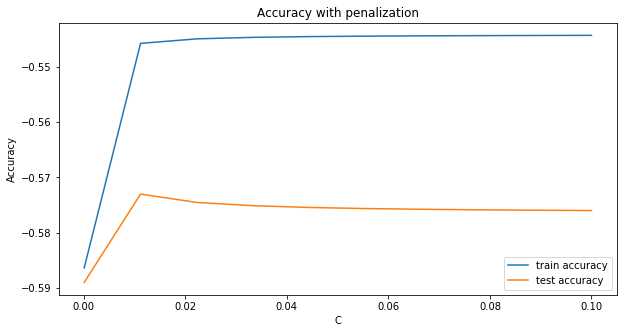

Best penalization parameter (C):  0.0112


In [33]:
# Let's plot the value of the cross-validation to see how the Mean squred error change with alpha
graph_cv(cv_results)
# this is the value of the best lambda
print("Best penalization parameter (C): ", lr_ridge_cv.best_params_['C'])

validation acc_score       :  0.6988335100742312
validation log loss      :  10.401933076268534


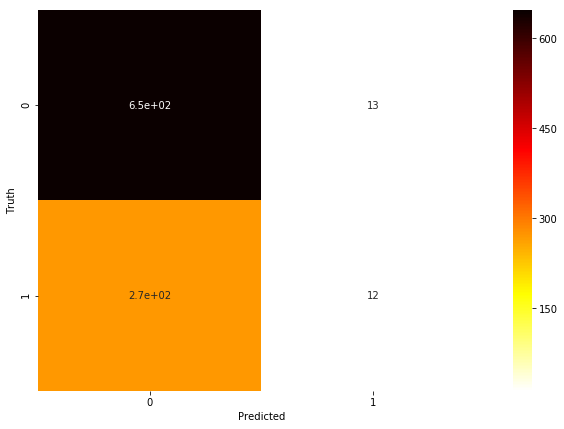

In [34]:
# Validation Results
r_acc_score, r_log_l, r_y_hat_validation = performance_results(lr_ridge_cv, X_validation, y_validation)
print("validation acc_score       : ", r_acc_score)
print("validation log loss      : ", r_log_l)

In [37]:
# Comparision of real and predicted values 
name_stocks.iloc[y_validation.index,]
output_df = pd.DataFrame(np.hstack([y_validation.values.reshape(-1,1), r_y_hat_validation.reshape(-1,1)]), 
                        index = list(name_stocks.iloc[y_validation.index,]), 
                        columns = ['Real', 'Predicted'])
output_df

,Real,Predicted
WPP,0,0
SLB,0,0
ATNM,0,0
MFG,0,0
RFI,0,0
...,...,...
TTGT,0,0
EAT,1,0
CTO,0,0
CIGI,0,0


test acc_score       :  0.7056451612903226
test log loss      :  10.166665627503107


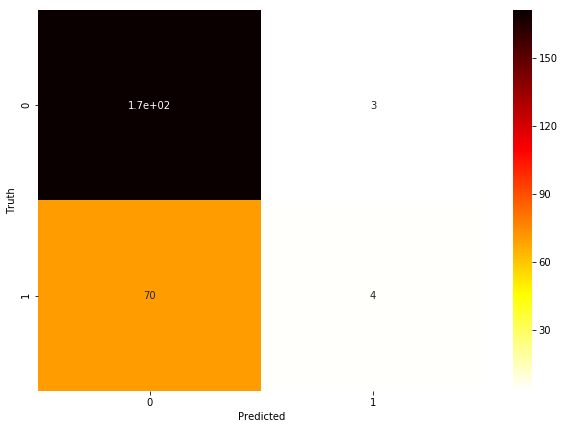

In [36]:
# Test Results
rt_acc_score, rt_log_l, rt_y_hat_test_ridge = performance_results(lr_ridge_cv, X_test, y_test)
print("test acc_score       : ", rt_acc_score)
print("test log loss      : ", rt_log_l)

In [38]:
# Using stock tickers to see the relative data
name_of_stock = list(name_stocks.iloc[y_test.index,])
print("Names stock: ", name_of_stock)

Names stock:  ['CRM', 'NRO', 'ARNA', 'AMRC', 'LKSD', 'CNC', 'CINF', 'AMOT', 'HUBS', 'MSEX', 'AMN', 'NFBK', 'EHI', 'UEIC', 'MVBF', 'VGI', 'PZN', 'KWR', 'BMCH', 'FISK', 'AMPE', 'LAMR', 'FOXF', 'OGEN', 'BHE', 'ACCO', 'NOW', 'POWI', 'OGS', 'AGM', 'HYI', 'ESCA', 'DDS', 'DNLI', 'JOBS', 'JTPY', 'XONE', 'ENJ', 'ARII', 'AMT', 'FPRX', 'AMRN', 'CYAD', 'FSB', 'AUPH', 'ILMN', 'ACHN', 'BUI', 'GOGL', 'FRA', 'RESI', 'SMMF', 'FWP', 'APT', 'PSMT', 'EFSC', 'CTMX', 'FRTA', 'THFF', 'ERJ', 'CDXC', 'GGB', 'RUBI', 'JBHT', 'VZA', 'EXK', 'WRI', 'CNTY', 'ZTR', 'OOMA', 'HLX', 'MCR', 'VLRX', 'LCUT', 'MNST', 'LOMA', 'CRTO', 'EXC', 'OIA', 'INGR', 'CUI', 'SHLX', 'BBN', 'KB', 'TDE', 'NSA', 'CBAN', 'DENN', 'XHR', 'YEXT', 'ZION', 'CVGW', 'MDWD', 'AUY', 'CNX', 'SELB', 'AZO', 'APB', 'FIBK', 'GROW', 'LINC', 'MIK', 'WF', 'AVH', 'LEE', 'HMY', 'ROKU', 'NCBS', 'CDK', 'BCOR', 'DHIL', 'CL', 'NOV', 'NOA', 'OBSV', 'NXST', 'SLRC', 'MOMO', 'PPIH', 'QDEL', 'CPAH', 'UE', 'SKX', 'MANU', 'ADI', 'PETQ', 'MUC', 'BCOV', 'LMRKP', 'AUBN', 'E

In [39]:
output_df_test = pd.DataFrame(np.hstack([y_test.values.reshape(-1,1), rt_y_hat_test_ridge.reshape(-1,1)]), 
                        index = name_of_stock, 
                        columns = ['Real', 'Predicted Ridge'])
output_df_test


,Real,Predicted Ridge
CRM,1,1
NRO,0,0
ARNA,1,0
AMRC,1,0
LKSD,0,0
...,...,...
CBH,0,0
AGR,1,1
BTE,0,0
HUD,0,0


# Model 2 - Logistic Regression - Lasso Penalization for Classification

In [40]:
# Defining our penalized Logistic regression using Lasso penalty
lr_lasso = LogisticRegression(solver = "saga", tol = 0.001,
                                   penalty = 'l1', random_state = 90, class_weight = 'None')
                                   # class_weight = 'balanced'


# Calibrating our shrink parameter 'C'
params ={'C':np.linspace(0.001,1, 10)}
lr_lasso_cv = GridSearchCV(estimator = lr_lasso, 
                                    param_grid = params,
                                    scoring ="neg_log_loss",
                                    return_train_score = True,
                                    cv =10)

In [41]:
# Fitting the model
lr_lasso_cv.fit(X_train, y_train)
cv_results = pd.DataFrame(lr_lasso_cv.cv_results_)

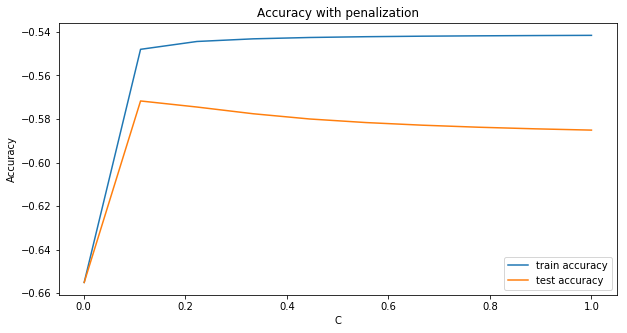

Best penalization parameter (C):  0.112


In [42]:
# Let's plot the value of the cross-validation to see how the Mean squred error change with alpha
graph_cv(cv_results)
# this is the value of the best lambda
print("Best penalization parameter (C): ", lr_lasso_cv.best_params_['C'])

validation acc_score       :  0.704135737009544
validation log loss      :  10.218799797825286


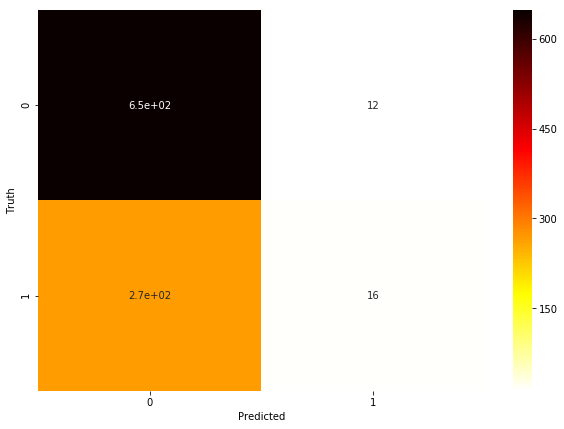

In [43]:
# Validation Results
l_acc_score, l_log_l, l_y_hat_val_lasso = performance_results(lr_lasso_cv, X_validation, y_validation)
print("validation acc_score       : ", l_acc_score)
print("validation log loss      : ", l_log_l)

test acc_score       :  0.7096774193548387
test log loss      :  10.027393143663021


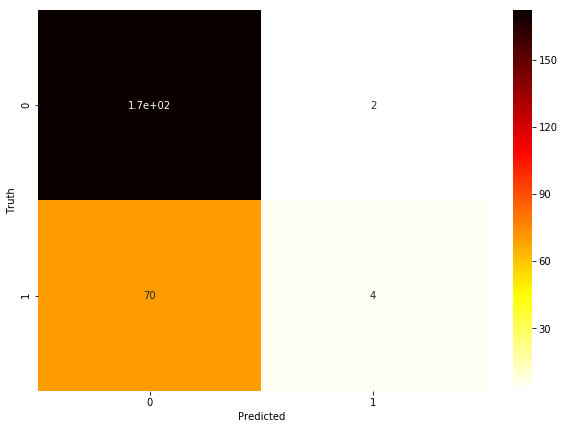

In [44]:
# Test Results
lt_acc_score, lt_log_l, lt_y_hat_test_lasso = performance_results(lr_lasso_cv, X_test, y_test)
print("test acc_score       : ", lt_acc_score)
print("test log loss      : ", lt_log_l)

In [45]:
# Comparision of predicted and reak outputs 
output_df = pd.DataFrame(np.hstack([y_test.values.reshape(-1,1), lt_y_hat_test_lasso.reshape(-1,1), rt_y_hat_test_ridge.reshape(-1,1)]), 
                        index = name_of_stock, 
                        columns = ['Real', 'Predicted Lasso', 'Predicted Ridge'])
output_df


,Real,Predicted Lasso,Predicted Ridge
CRM,1,1,1
NRO,0,0,0
ARNA,1,0,0
AMRC,1,0,0
LKSD,0,0,0
...,...,...,...
CBH,0,0,0
AGR,1,1,1
BTE,0,0,0
HUD,0,0,0


In [46]:
#Output of lasso and ridge predicted probabilities 
lasso_pred_proba = lr_lasso_cv.predict_proba(X_test)
ridge_pred_proba = lr_ridge_cv.predict_proba(X_test)

lasso_pred_proba_df = pd.DataFrame(np.hstack([lasso_pred_proba, lt_y_hat_test_lasso.reshape(-1,1), y_test.values.reshape(-1,1)]),
                    index = name_of_stock, 
                    columns = ['Prob 0', 'Prob 1', 'Lasso pred', 'True'])

ridge_pred_proba_df = pd.DataFrame(np.hstack([ridge_pred_proba, rt_y_hat_test_ridge.reshape(-1,1), y_test.values.reshape(-1,1)]),
                    index = name_of_stock, 
                    columns = ['Prob 0', 'Prob 1', 'Ridge pred', 'True'])


In [47]:
lasso_pred_proba_df

,Prob 0,Prob 1,Lasso pred,True
CRM,0.418565,0.581435,1.0,1.0
NRO,0.805799,0.194201,0.0,0.0
ARNA,0.697832,0.302168,0.0,1.0
AMRC,0.737271,0.262729,0.0,1.0
LKSD,0.719638,0.280362,0.0,0.0
...,...,...,...,...
CBH,0.805799,0.194201,0.0,0.0
AGR,0.442681,0.557319,1.0,1.0
BTE,0.823039,0.176961,0.0,0.0
HUD,0.706241,0.293759,0.0,0.0


In [48]:
ridge_pred_proba_df

,Prob 0,Prob 1,Ridge pred,True
CRM,0.390284,0.609716,1.0,1.0
NRO,0.799703,0.200297,0.0,0.0
ARNA,0.701288,0.298712,0.0,1.0
AMRC,0.740206,0.259794,0.0,1.0
LKSD,0.714897,0.285103,0.0,0.0
...,...,...,...,...
CBH,0.799703,0.200297,0.0,0.0
AGR,0.459374,0.540626,1.0,1.0
BTE,0.832937,0.167063,0.0,0.0
HUD,0.710259,0.289741,0.0,0.0


# Model 3 - Random Forest in Classification

In [49]:
#Random Forest 
rf = RandomForestClassifier(random_state = 90)

parameters = {'n_estimators':[2,5,10,15,40,50,80,100,150,200],
             'max_depth':range(1,5)}

rf_cv =GridSearchCV(estimator = rf, 
                    param_grid = parameters,
                    scoring ="neg_log_loss",  
                    return_train_score = True,
                    cv =10)

In [50]:
#Fitting the model
rf_cv.fit(X_train, y_train)
print(rf_cv.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=90, verbose=0, warm_start=False)


validation acc_score       :  0.704135737009544
validation log loss      :  10.218790470601816
test acc_score       :  0.7137096774193549
test log loss      :  9.888117435639751


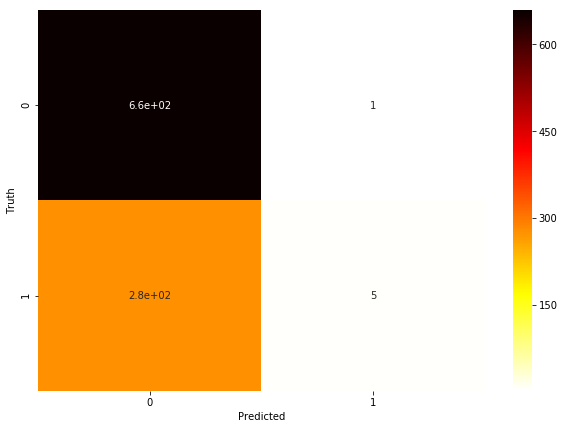

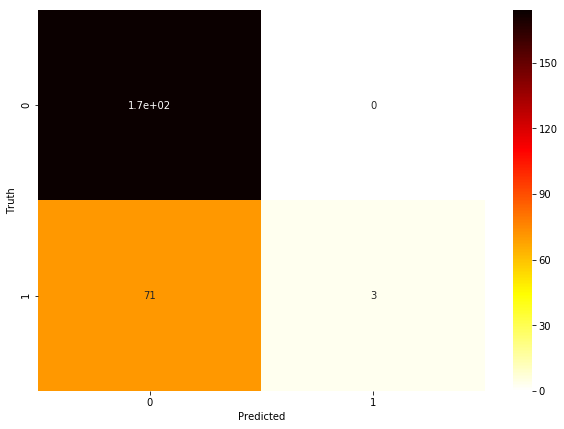

In [52]:
# Validation results
rf_acc_score, rf_log_l, rf_y_hat_validation = performance_results(rf_cv, X_validation, y_validation)
print("validation acc_score       : ", rf_acc_score)
print("validation log loss      : ", rf_log_l)

# Test results
rft_acc_score, rft_log_l, rft_y_hat_test = performance_results(rf_cv, X_test, y_test)
print("test acc_score       : ", rft_acc_score)
print("test log loss      : ", rft_log_l)

In [53]:
# Output of real and predicted data
output_df = pd.DataFrame(np.hstack([y_test.values.reshape(-1,1), rft_y_hat_test.reshape(-1,1)]), 
                        index = list(name_stocks.iloc[y_test.index].values), 
                        columns = ['Real', 'Random Forest Predicted'])
output_df

,Real,Random Forest Predicted
CRM,1,0
NRO,0,0
ARNA,1,0
AMRC,1,0
LKSD,0,0
...,...,...
CBH,0,0
AGR,1,0
BTE,0,0
HUD,0,0


# Model 4 - Random Forest Classification with ADA Boosting

In [54]:
#Random Forest Boosting
# ADA Boosting Classifier
dtc = DecisionTreeClassifier(max_depth =3 ,random_state = 90)
adab_clf = AdaBoostClassifier(base_estimator = dtc, random_state = 90)

parameters = {'n_estimators':[2,5,10],
             'learning_rate':np.linspace(1,5,4)}

# Specify the cross-validation
adab_clf_cv =GridSearchCV(estimator = adab_clf, 
                    param_grid = parameters,
                    scoring ="neg_log_loss",  # accuracy
                    return_train_score = True,
                    cv =10)

In [55]:
adab_clf_cv.fit(X_train, y_train)
print(adab_clf_cv.best_estimator_)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=90,
            splitter='best'),
          learning_rate=1.0, n_estimators=2, random_state=90)


validation acc_score       :  0.6861081654294804
validation log loss      :  10.841489914254447
test acc_score       :  0.7217741935483871
test log loss      :  9.609617606524191


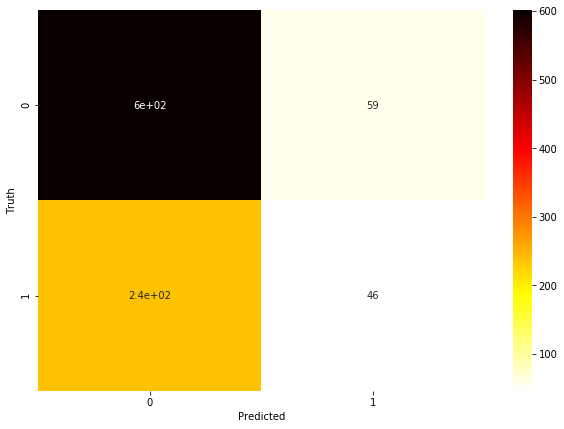

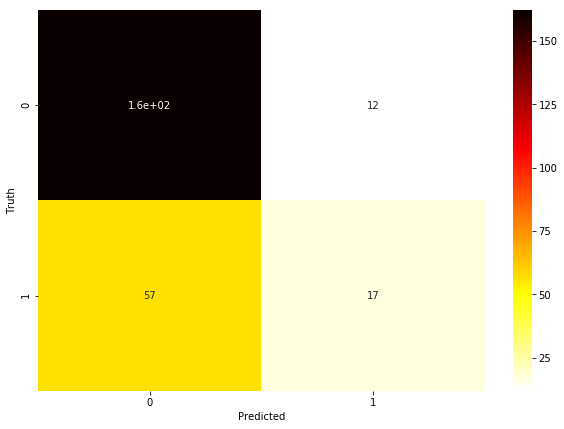

In [56]:
#Validation results
ada_acc_score, ada_log_l, ada_y_hat_validation = performance_results(adab_clf_cv, X_validation, y_validation)
print("validation acc_score       : ", ada_acc_score)
print("validation log loss      : ", ada_log_l)

#Test results
adat_acc_score, adat_log_l, adat_y_hat_test = performance_results(adab_clf_cv, X_test, y_test)
print("test acc_score       : ", adat_acc_score)
print("test log loss      : ", adat_log_l)

# Model 5 - Random Forest Classification with Gradient Boosting 

In [57]:
# Gradient Boosting Classifier 

gb_clf = GradientBoostingClassifier(random_state = 90)

parameters = {'n_estimators':[2,5,10],
             'learning_rate':np.linspace(0.1,0.5,5)}

# Specify the cross-validation
gb_clf_cv =GridSearchCV(estimator = gb_clf, 
                    param_grid = parameters,
                    scoring ="neg_log_loss",  # accuracy
                    return_train_score = True,
                    cv =10)

In [58]:
#Fitting the model 
gb_clf_cv.fit(X_train, y_train)
print(gb_clf_cv.best_estimator_)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.30000000000000004, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=90, subsample=1.0, verbose=0,
              warm_start=False)


validation acc_score       :  0.704135737009544
validation log loss      :  10.218820148131039
test acc_score       :  0.7258064516129032
test log loss      :  9.470325777584991


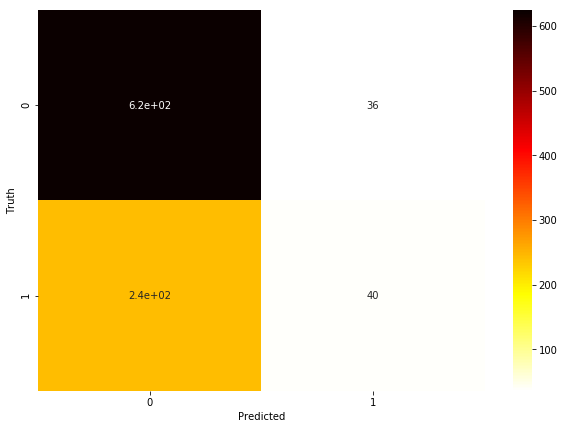

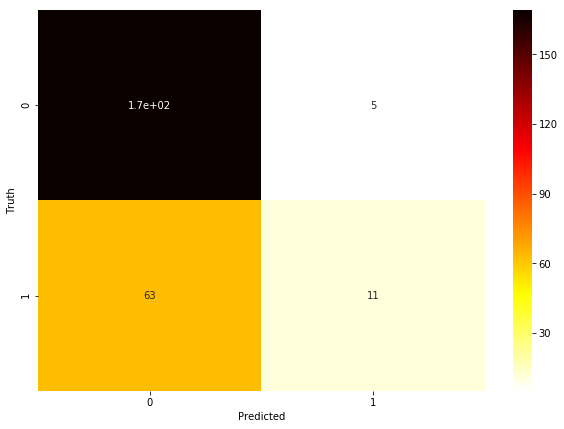

In [59]:
# Validation results
gb_acc_score, gb_log_l, gb_y_hat_validation = performance_results(gb_clf_cv, X_validation, y_validation)
print("validation acc_score       : ", gb_acc_score)
print("validation log loss      : ", gb_log_l)

# Test results
gbt_acc_score, gbt_log_l, gbt_y_hat_test = performance_results(gb_clf_cv, X_test, y_test)
print("test acc_score       : ", gbt_acc_score)
print("test log loss      : ", gbt_log_l)

# Model 6 - Neural Networks 

In [60]:
#Neural Networks
y_train_nn = np.array(pd.get_dummies(y_train).values)
y_test_nn = np.array(pd.get_dummies(y_test).values)

In [61]:
#Creating a model
def classification_model(x, y, n_neurons):
    model = Sequential()
    model.add(Dense(n_neurons[0], input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(y.shape[1], kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [62]:
n_neurons = [80]
classification_model_hl = classification_model(X_train, y_train_nn, n_neurons)
classification_model_hl.summary()

# Fit the model
classification_model_hl.fit(X_train, y_train_nn, epochs=100, batch_size=5, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                18320     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 162       
Total params: 18,482
Trainable params: 18,482
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
754/754 - 1s - loss: 0.5881 - accuracy: 0.7230
Epoch 2/100
754/754 - 1s - loss: 0.5436 - accuracy: 0.7408
Epoch 3/100
754/754 - 1s - loss: 0.5285 - accuracy: 0.7495
Epoch 4/100
754/754 - 1s - loss: 0.5088 - accuracy: 0.7588
Epoch 5/100
754/754 - 1s - loss: 0.4967 - accuracy: 0.7676
Epoch 6/100
754/754 - 1s - loss: 0.4836 - accuracy: 0.7713
Epoch 7/100
754/754 - 1s - loss: 0.4697 - accuracy: 0.7798
Epoch 8/100
754/754 - 1s - loss: 0.4518 - accuracy: 0.7912
Epoch 9/100
754/754 - 1s - loss: 0.4387 - 

In [63]:
scores = classification_model_hl.evaluate(X_test, y_test_nn, verbose=0)
print('Test log-loss:', scores[0])
print('Test accuracy:', scores[1])

Test log-loss: 3.146029233932495
Test accuracy: 0.7016128897666931


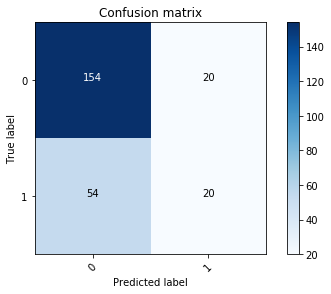

In [64]:
y_pred = classification_model_hl.predict(X_test)
# Convert predictions probabilities to classes
# We need select which classes has the highest probability
y_pred_classes = np.argmax(y_pred, axis = 1) 

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes) 


# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(y_pred.shape[1]))

# Part C

In [65]:
#Creating lists of all the accuracy scores and log losses for each model 
acc_scores = []
log_loss = []
lables = []
lables.extend(['Lasso', 'Ridge', 'Random Forest', 'ADA Booster', 'Gb' , 'Neural Networks' ])
acc_scores.extend([lt_acc_score, rt_acc_score, rft_acc_score, adat_acc_score, gbt_acc_score, scores[1]])
log_loss.extend([lt_log_l, rt_log_l, rft_log_l, adat_log_l, gbt_log_l, scores[0]])

In [66]:
#Creating a Dataframe of the comparisions 
scores = {'Lables': lables,
          'Accuracy Scores': acc_scores,
           'Log Loss': log_loss}

scores_df = pd.DataFrame(scores)

In [67]:
scores_df

,Lables,Accuracy Scores,Log Loss
0,Lasso,0.709677,10.027393
1,Ridge,0.705645,10.166666
2,Random Forest,0.713710,9.888117
3,ADA Booster,0.721774,9.609618
4,Gb,0.725806,9.470326
5,Neural Networks,0.701613,3.146029


Gradient Booster is the best model for this data


In [68]:
#Loading stock_test dataset
test_data = pd.read_csv(r'D:\Stock_test.csv', sep = ",")
test_data.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.1865,0.2348,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,-0.1421,-0.2785,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.0592,0.0772,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.0000,0.0000,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.1408,-0.2619,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials


In [69]:
# Dropping the columns that we dint use for training the model
test_data = test_data.drop(more_than_fifty, axis = 1)

In [70]:
#Replacing all the missing value with medians grouped by each sector
test_data = test_data.fillna(data.groupby('Sector').transform('median'))

In [71]:
#Storing the test stock tickers 
test_name_stocks = test_data['Unnamed: 0']

In [72]:
test_data = test_data.drop(['Unnamed: 0', 'operatingProfitMargin'], axis = 1)

In [73]:
#Creating dummies
dummies_test = pd.get_dummies(test_data['Sector'])

In [74]:
test_data = pd.concat([test_data, dummies_test], axis=1)

In [75]:
test_data = test_data.drop(['Sector'], axis=1)

In [76]:
#Scaling the test data
std_scal = StandardScaler()
test_data_std = std_scal.fit_transform(test_data)

In [77]:
#Since gradient boosting gave us the vest results, we will use that to predict our class for the test set
y_hat_final = gb_clf_cv.predict(test_data_std)

In [78]:
#Converting the results to dataframe
y_df = pd.DataFrame(y_hat_final)

In [79]:
y_df ["Stock tickers"] = test_name_stocks
y_df = y_df[["Stock tickers", 0]]
y_df = y_df.rename(columns={0: "Result"})

In [80]:
#Dataframe with all the stockes that are profitable according to our model
y_df_ones = y_df[y_df["Result"] == 1]

In [81]:
y_df, y_df_ones

(     Stock tickers  Result
 0            CMCSA       0
 1              KMI       0
 2             INTC       0
 3               MU       0
 4               GE       0
 ...            ...     ...
 4387          YRIV       0
 4388          YTEN       0
 4389          ZKIN       0
 4390           ZOM       0
 4391          ZYME       0
 
 [4392 rows x 2 columns],      Stock tickers  Result
 8             SIRI       1
 78            MSCI       1
 97            SCHW       1
 189              D       1
 199           SBUX       1
 ...            ...     ...
 4219          OXBR       1
 4258          RBCN       1
 4266          RGCO       1
 4291          SIEB       1
 4346          UAMY       1
 
 [183 rows x 2 columns])

# Part C4 

In [82]:
#Downloading the actual 2018 and 2019 prices of our stocks 
one_tickers = list(y_df_ones['Stock tickers'])
Tickers = one_tickers
start = datetime.datetime(2018,12,31)
end = datetime.datetime(2019,12,31)
data = yf.download(Tickers, start = start, end = end, interval = '1d')
prices = data['Adj Close']

[*********************100%***********************]  183 of 183 completed

3 Failed downloads:
- ANFI: No data found, symbol may be delisted
- NTRSP: No data found, symbol may be delisted
- CRR: No data found, symbol may be delisted


In [84]:
#Dropping the columns with no 2018 data 
prices = prices.dropna(axis='columns')

In [85]:
price_2018 = prices.iloc[0,:] #2018 price
price_2019 = prices.iloc[-1,:] #2019 price

series = { '2018 price': price_2018 , '2019 price': price_2019 } #series of the prices

prices_df = pd.DataFrame(series) # dataframe of the prices

prices_df['Price Change'] = prices_df['2019 price'] - prices_df['2018 price'] #computing the difference of the 2 prices

In [86]:
prices_df

,2018 price,2019 price,Price Change
ADMP,2.250000,0.690000,-1.560000
ADSK,128.610001,183.300003,54.690002
ADUS,67.879997,96.300003,28.420006
AE,37.000904,36.605408,-0.395496
AEE,62.777470,75.607780,12.830311
...,...,...,...
YNDX,27.350000,43.439999,16.089998
YUM,89.537971,99.669144,10.131172
YY,59.860001,53.779999,-6.080002
Z,31.580000,45.630001,14.050001


In [87]:
#Computing the absolute variation. If we buy 1 unit of each sof the stock, the net change in the portfolio is avsolute variation
absolute_variation = prices_df['Price Change'].sum()

In [88]:
absolute_variation

2295.1582525372505